# Comment Toxicity Rater
- slimmed down from GDrive's ToxicityRater.ipynb (also contains cap letter count)
- profanity score + toxic probability (1 being 100% toxic, 0 being not toxic at all) + exclamation mark count (if more than 0.5 profanity score)


Resources from: 

1) https://pypi.org/project/alt-profanity-check/ 

2) https://github.com/importdata/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment_Analysis_Support_Vector_Classifier.ipynb


In [1]:
import sklearn
import numpy as np
import pandas as pd

# Dependencies
alt-profanity-check==1.0.2.1
appnope==0.1.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
attrs==21.4.0
backcall==0.2.0
black==21.12b0
bleach==4.1.0
cffi==1.15.0
click==8.0.3
cycler==0.11.0
debugpy==1.5.1
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.3
executing==0.8.2
fonttools==4.29.0
importlib-resources==5.4.0
install==1.3.5
ipykernel==6.7.0
ipython==8.0.1
ipython-genutils==0.2.0
ipywidgets==7.6.5
jedi==0.18.1
Jinja2==3.0.3
joblib==1.1.0
jsonschema==4.4.0
jupyter==1.0.0
jupyter-client==7.1.2
jupyter-console==6.4.0
jupyter-core==4.9.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.2
kiwisolver==1.3.2
MarkupSafe==2.0.1
matplotlib==3.5.1
matplotlib-inline==0.1.3
mistune==0.8.4
mypy-extensions==0.4.3
nbclient==0.5.10
nbconvert==6.4.1
nbformat==5.1.3
nest-asyncio==1.5.4
notebook==6.4.8
numpy==1.22.1
packaging==21.3
pandas==1.4.0
pandocfilters==1.5.0
parso==0.8.3
pathspec==0.9.0
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.0.0
platformdirs==2.4.1
prometheus-client==0.13.1
prompt-toolkit==3.0.26
ptyprocess==0.7.0
pure-eval==0.2.2
pycparser==2.21
Pygments==2.11.2
pyparsing==3.0.7
pyrsistent==0.18.1
python-dateutil==2.8.2
pytz==2021.3
pyzmq==22.3.0
qtconsole==5.2.2
QtPy==2.0.0
regex==2022.1.18
scikit-learn==1.0.2
scipy==1.7.3
Send2Trash==1.8.0
six==1.16.0
sklearn==0.0
stack-data==0.1.4
terminado==0.13.1
testpath==0.5.0
threadpoolctl==3.0.0
tomli==1.2.3
tornado==6.1
traitlets==5.1.1
tweet-preprocessor==0.6.0
typing_extensions==4.0.1
wcwidth==0.2.5
webencodings==0.5.1
widgetsnbextension==3.5.2
zipp==3.7.0

In [3]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [4]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [9]:
!pwd

/Users/ericling/Documents/GitHub/DataSci Projects/KaggleToxicity/Kaggle_ToxicityRater


In [10]:
####modified from https://github.com/importdata/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment_Analysis_Support_Vector_Classifier.ipynb

# training twitter data
train = pd.read_csv("./data/train.csv")

#train wiki data
# train_wiki = pd.read_csv("/content/train_wiki.csv")

# test data
test = pd.read_csv("./data/validation_data.csv")


In [11]:
# train.head()
# test.tail()
# train.tail()
# check if there are any missing values
# train.isnull().sum()
#train.isnull().values.any()


In [12]:
from profanity_check import predict_prob

def exc_cnt(df):
  #shorter function using python for counting exclamation marks 
  return [len(re.findall(r'\!', line)) if predict_prob([line])>0.5 else 0 for line in df ] #if there is a filter condition, can do an 'if' after df


/Users/ericling/Documents/GitHub/DataSci Projects/KaggleToxicity/Kaggle_ToxicityRater/kaggle_kernel/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ericling/Documents/GitHub/DataSci Projects/KaggleToxicity/Kaggle_ToxicityRater/kaggle_kernel/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ericling/Documents/GitHub/DataSci Projects

In [13]:
from profanity_check import predict_prob

def prof_check(df):
  profa_list = []
  for line in df:
    profa_list.append(predict_prob (line))

  return profa_list


In [14]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [15]:
# append cleaned tweets, exclamation mark counter to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.tail(15)

,id,label,tweet,clean_tweet
31947,31948,1,@user @user you don't have the balls to hashta...,you dont have the balls to hashtag me as a but...
31948,31949,1,"makes you ask yourself, who am i? then am i a...",makes you ask yourself who am i then am i anyb...
31949,31950,0,hear one of my new songs! don't go - katie ell...,hear one of my new songs! dont go katie ellie
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt...",you can try to tail us to stop butt were just ...
31951,31952,0,i've just posted a new blog: #secondlife #lone...,ive just posted a new blog
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning
31954,31955,0,#holiday bull up: you will dominate your bul...,bull up you will dominate your bull and you wi...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...


In [16]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["less_toxic"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["less_toxic_clean_tweet"] = test_tweet


test_tweet = clean_tweets(test["more_toxic"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["more_toxic_clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.tail()


,worker,less_toxic,more_toxic,less_toxic_clean_tweet,more_toxic_clean_tweet
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis,im sorry im not an admin i will give you three...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis,im sorry im not an admin i will give you three...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook,woware you out of your mind how was my edit on...,piss off you slant eyed gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook,woware you out of your mind how was my edit on...,piss off you slant eyed gook
30107,54,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook,woware you out of your mind how was my edit on...,piss off you slant eyed gook


In [17]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)




In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# initalize vectorizer: vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english') #stop_words removed: a, the

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test) + list(test["less_toxic_clean_tweet"].values) + 
               list(test["more_toxic_clean_tweet"].values)) #need to add test_comb.combined_comments.values otherwise the words would not be in the vectorizer 

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

#validation data vectorization
# x_val_vec = vectorizer.transform(x_val_sma)
# x_val_vec_big = vectorizer.transform(x_val_big)

#validate on the lesser data first
x_val_less = vectorizer.transform(test["less_toxic_clean_tweet"])
x_val_more = vectorizer.transform(test["more_toxic_clean_tweet"])

In [19]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm

base_clf = svm.SVC(kernel = 'linear', probability=True)

base_clf.fit(x_train_vec, y_train)

calibrated_clf = CalibratedClassifierCV(
     base_estimator=base_clf,
     cv="prefit"
 )

calibrated_clf.fit(x_test_vec, y_test) #cv calibration on the "test" data which is from the twitter data // same as train


calibrated_clf.predict_proba(x_test_vec)





array([[0.96424967, 0.03575033],
       [0.97727368, 0.02272632],
       [0.95993825, 0.04006175],
       ...,
       [0.9834536 , 0.0165464 ],
       [0.98072707, 0.01927293],
       [0.16830364, 0.83169636]])

In [20]:
def prob_cate_diff(more, less):
  # find the difference in categorizing less toxic 
    # 'more' is the countVectorized vector of the more toxic validation data, 'less' is the less toxic countvectorized data
  prof_less = pd.DataFrame(prof_check([test["less_toxic_clean_tweet"]])).T 
  prof_more = pd.DataFrame(prof_check([test["more_toxic_clean_tweet"]])).T 
    
  
  y_pred_toxic_prob_less = pd.DataFrame(calibrated_clf.predict_proba(less))[1] +  prof_less + pd.DataFrame(exc_cnt(test["less_toxic_clean_tweet"])) 
  y_pred_toxic_prob_more = pd.DataFrame(calibrated_clf.predict_proba(more))[1] + prof_more + pd.DataFrame(exc_cnt(test["more_toxic_clean_tweet"]))

  # print ( y_pred_toxic_prob_more[:,1], 'less\' toxic classification prob: ', y_pred_toxic_prob_less[:,1)
  print('more - less: ', y_pred_toxic_prob_more - y_pred_toxic_prob_less,
        'equal scores: ',y_pred_toxic_prob_more == y_pred_toxic_prob_less)
  return y_pred_toxic_prob_more, y_pred_toxic_prob_less
  

In [21]:
prof_less = prof_check([test["less_toxic_clean_tweet"]]) 
prof_less = np.array(prof_less[0]) #predicted less toxic tweet's profanity prob

prof_more = prof_check([test["more_toxic_clean_tweet"]]) 
prof_more = np.array(prof_more[0])

In [22]:
exc_less = exc_cnt(test["less_toxic_clean_tweet"]) #exclamation mark counter if the profanity score is more than 0.5
exc_more = exc_cnt(test["more_toxic_clean_tweet"])

In [23]:
tox_prob_less = calibrated_clf.predict_proba(x_val_less)
tox_prob_more = calibrated_clf.predict_proba(x_val_more)


In [24]:
pred_less = tox_prob_less[:,1] + exc_less + prof_less 
pred_more = tox_prob_more[:,1] + exc_more + prof_more

In [25]:
pd.DataFrame(pred_less).value_counts()
pd.DataFrame(pred_more).value_counts()

1.113654    121
0.096645     78
1.195993     27
0.976475     24
1.045991     21
           ... 
0.318351      1
0.791408      1
0.789489      1
0.125583      1
0.001122      1
Length: 11469, dtype: int64

In [26]:
pd.DataFrame(pred_more).max()

0    4817.059014
dtype: float64

(array([3.0103e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([1.12189458e-03, 4.94261840e+02, 9.88522559e+02, 1.48278328e+03,
        1.97704400e+03, 2.47130471e+03, 2.96556543e+03, 3.45982615e+03,
        3.95408687e+03, 4.44834759e+03, 4.94260831e+03]),
 <BarContainer object of 10 artists>)

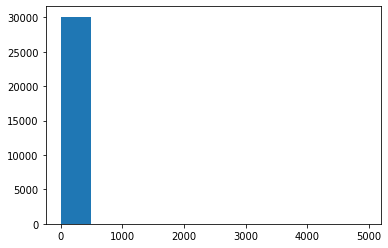

In [27]:
from matplotlib import pyplot as plt 

plt.hist(pred_less)

(array([3.0074e+04, 2.3000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([1.12189458e-03, 4.81706911e+02, 9.63412700e+02, 1.44511849e+03,
        1.92682428e+03, 2.40853007e+03, 2.89023586e+03, 3.37194165e+03,
        3.85364744e+03, 4.33535322e+03, 4.81705901e+03]),
 <BarContainer object of 10 artists>)

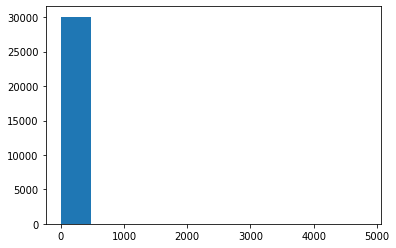

In [28]:
from matplotlib import pyplot as plt 

plt.hist(pred_more)

(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 3.007e+04,
        3.000e+00, 0.000e+00, 0.000e+00, 8.000e+00]),
 array([-4941.65893296, -3965.90510047, -2990.15126799, -2014.3974355 ,
        -1038.64360301,   -62.88977053,   912.86406196,  1888.61789445,
         2864.37172694,  3840.12555942,  4815.87939191]),
 <BarContainer object of 10 artists>)

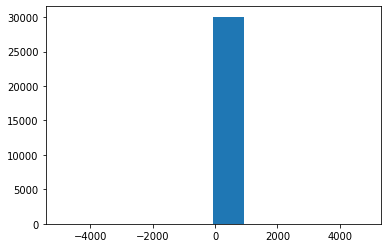

In [29]:
plt.hist(pred_more - pred_less) #ideally should not have anything below 0 or at 03